In [1]:
import pandas as pd
import numpy as np
import glob 
from os.path import join
import ntpath
import os
from collections import defaultdict
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
%matplotlib inline

In [2]:
def matplotlib_setup():
    from matplotlib.pyplot import figure
    figure(figsize=(18,6))
    font = {'size'   : 35}
    plt.rc('font', **font)
    plt.rcParams["axes.linewidth"]  = 2.5
    plt.grid(linewidth=3,axis='y', color='grey')
    
    CB91_Blue = '#2CBDFE'
    CB91_Green = '#47DBCD'
    CB91_Pink = '#F3A0F2'
    CB91_Purple = '#9D2EC5'
    CB91_Violet = '#661D98'
    CB91_Amber = '#F5B14C'
    color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

In [3]:
eval_type='all'
FILTERED = False
if FILTERED:
    outfile_regex = 'RF_mem_effect_{}_filtered.png'
else:
    outfile_regex = 'RF_mem_effect_{}.png'
def get_dataroot():
    return '/data/juma/data/ids18/'

In [4]:
def get_sampling_dirs(a_dir, only=''):
    dirs = [os.path.join(a_dir, name) for name in os.listdir(a_dir) 
                if os.path.isdir(os.path.join(a_dir, name)) and name.endswith('_l') ]
    return sorted(dirs)

In [5]:
def get_avg_abs_recall(d,eval_type):
    df = pd.read_csv(join(d,'recall','fold_test'+eval_type+'.csv'))
        
    filtered_attacks = ['Benign','Infiltration','Brute Force-XSS', 'SQL Injection']
    if FILTERED:
        avg_dt = df[(df['Label']!='Macro Average of Attacks') & (df['Label']!='Weighted Average of Attacks')&
                (~df['Label'].isin(filtered_attacks))]['Rc'].mean()
    else:
        avg_dt = df[(df['Label']!='Macro Average of Attacks') & (df['Label']!='Weighted Average of Attacks')]['Rc'].mean()
    return avg_dt,None,None

In [6]:
def extract_sampler_names(dir_names):
    sampler_names = []
    for dir_name in dir_names:
        if 'SFS' in dir_name:
            label = 'SketchFlow Sampling'
        elif 'SGS' in dir_name:
            label = 'Sketch Guided Sampling'
        elif 'SRS' in dir_name:
            label = 'Simple Random Sampling'
        elif 'FFS' in dir_name:
            label = 'Fast Filtered Sampling'
        elif 'WS' in dir_name:
            label = 'Without Sampling'
        else:
            print('Investigate plot_comparison',dir_name)
            
        sampler_names.append(label)
    return sampler_names

WS [90.70285714285716, 67.63857142857142, 34.47071428571429, 29.50857142857143]


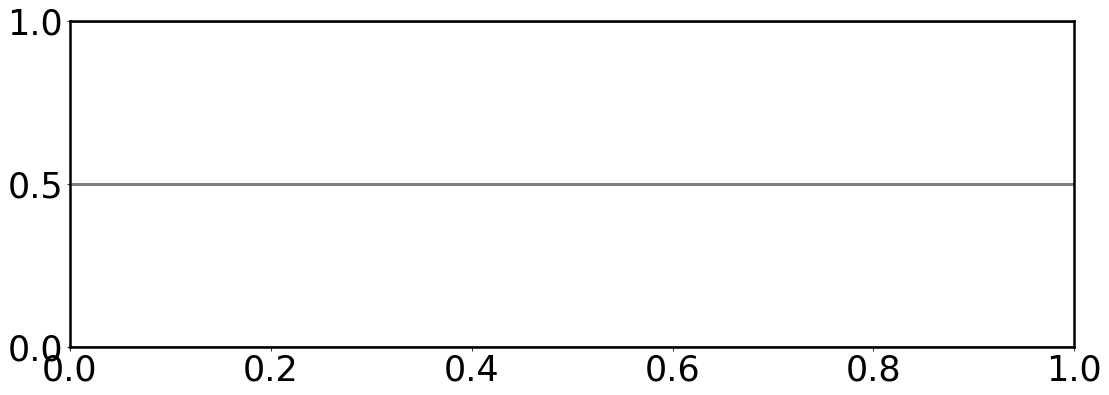

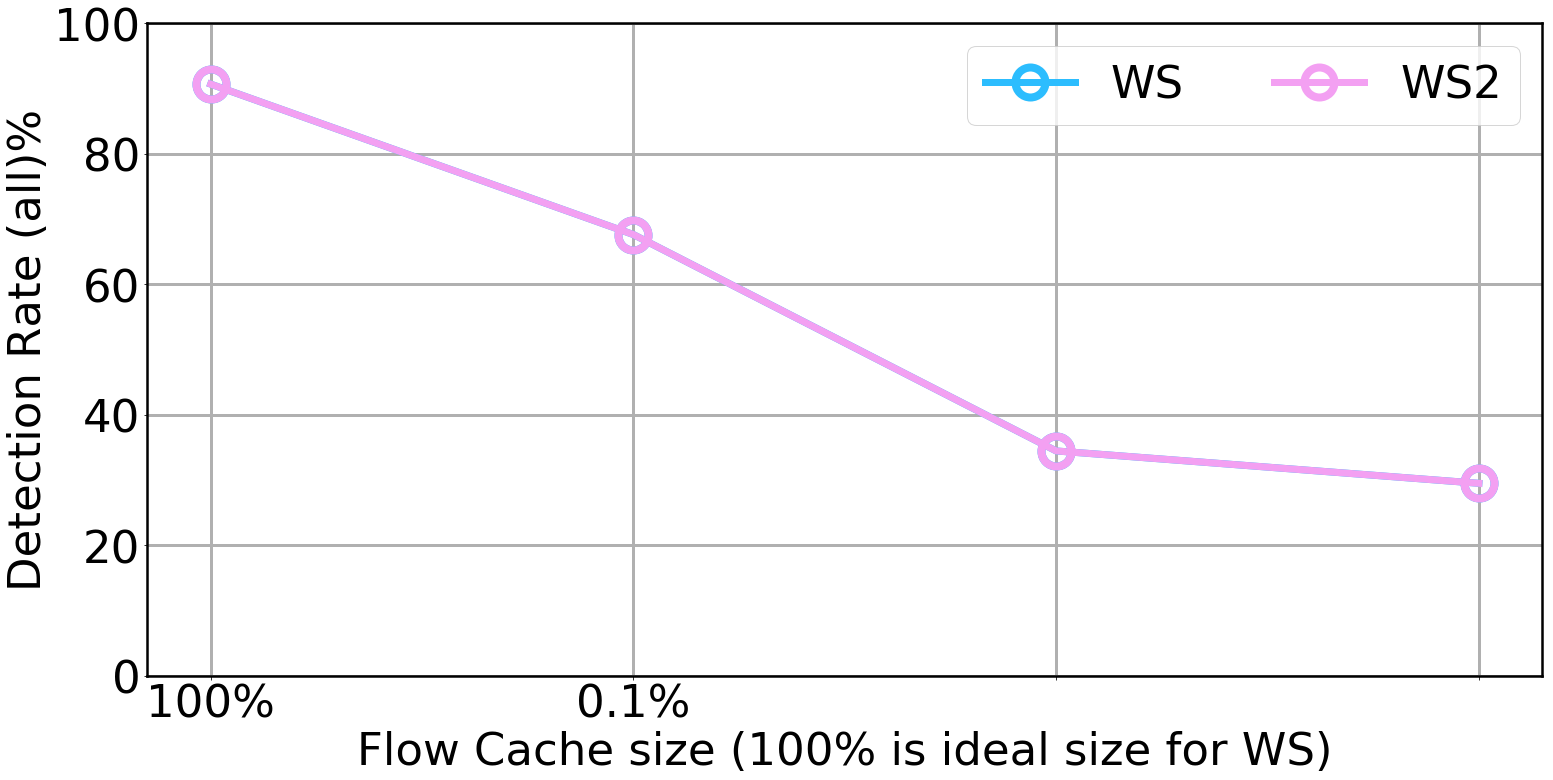

In [15]:
WS_dirs = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/WS_l/',
         '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/WS_l/',
         '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/WS_l/',           
         '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/WS_l/',
        ]

xtick_indices = np.arange(len(WS_dirs))
xtick_labels = ['100%','0.1%']#,'5%','1%','0.5','0.1%']
classifier_fingerprint = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01_md_25'


recalls = defaultdict(list)
if 1==1:     
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type=eval_type) for d in WS_dirs]
    for i in range(len(avg_abs_rcs)):
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls['WS'].append(avg_dr)
        
#drawing
matplotlib_setup()
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
print('WS',recalls['WS'])
ax.plot(np.arange(len(WS_dirs)),recalls['WS'],label='WS',linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')

plt.grid(linewidth=3)

plt.ylabel('Detection Rate ({})%'.format(eval_type))
plt.xlabel('Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
ax.set_ylim(0,100)
#plt.yticks([30,40,50,60],['30','40','50','60'])
#fig.tight_layout()
plt.legend(ncol=2)

outfile = join(WS_dirs[0],outfile_regex.format(eval_type))
#plt.savefig(outfile, bbox_inches='tight',dpi=100)
#plt.show()

['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_1.0/FFS_(8,16,40)_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_1.0/SFS_SI_95.33_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_1.0/SGS_e_1_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_1.0/SRS_SI_100_l']
['/data/juma/data/ids18/CSVs_r_0.001_m_1.0/SR_1.0/FFS_(8,16,40)_l', '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/SR_1.0/SFS_SI_95.33_l', '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/SR_1.0/SGS_e_1_l', '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/SR_1.0/SRS_SI_100_l']
Fast Filtered Sampling [34.96857142857143, 33.42714285714286]
SketchFlow Sampling [34.64214285714286, 35.69214285714286]
Sketch Guided Sampling [44.47357142857144, 44.47785714285715]
Simple Random Sampling [43.36642857142857, 40.629999999999995]


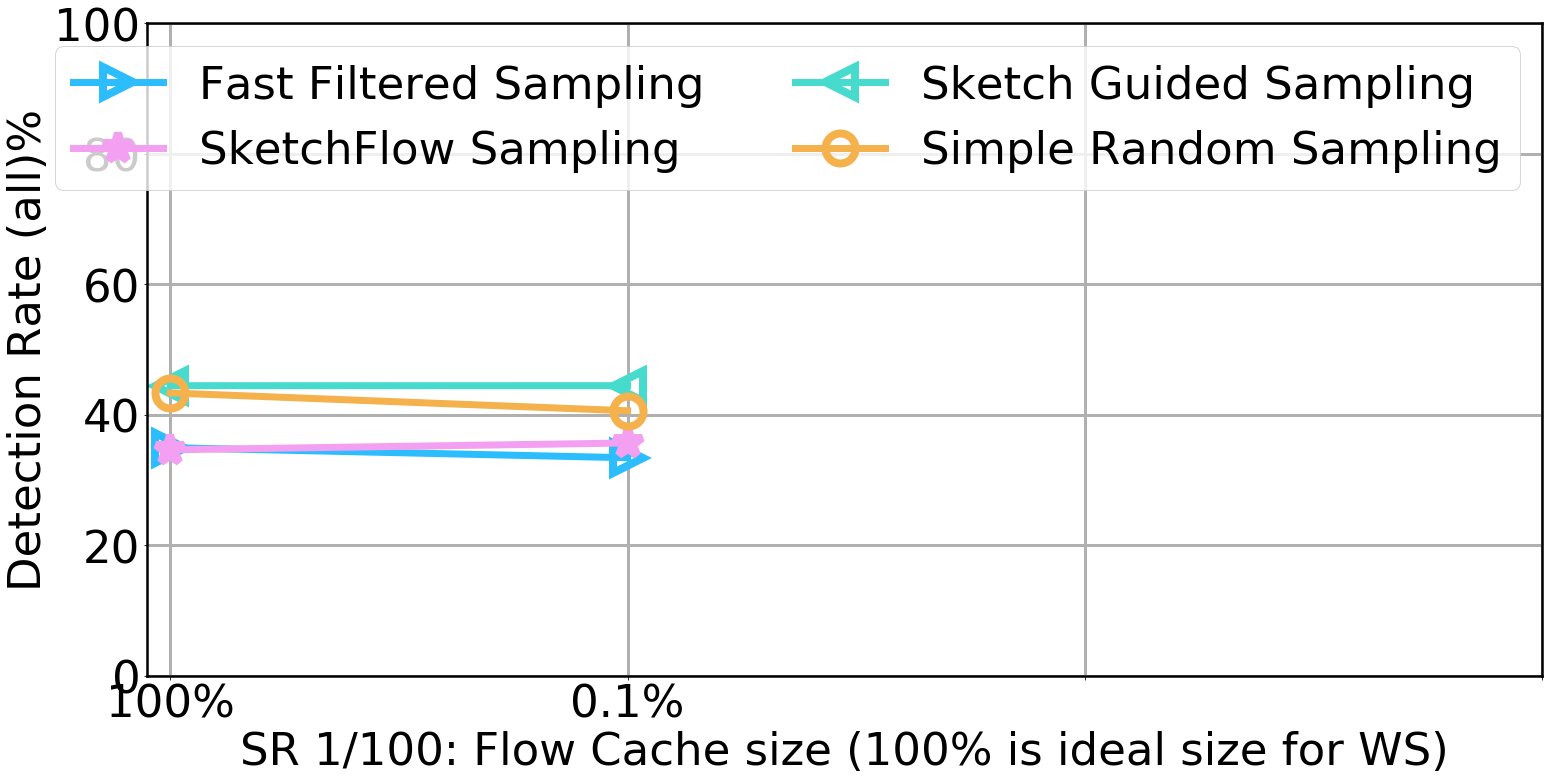

In [14]:
ws_dt = defaultdict(lambda: list) 
ws_dt['all']= [90.0, 24.22]
ws_dt['any'] = [99.08, 92.31]

sr_dir = 'SR_1.0'
roots = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
         #'/data/juma/data/ids18/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
         #'/data/juma/data/ids18/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
         '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir),
        ]

classifier_fingerprint = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01_md_25'

recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    print(sampling_dirs)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type=eval_type) for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls[name].append(avg_dr)
        
    
#drawing
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')
#ax.plot(np.arange(len(roots)),ws_dt[eval_type],label='WS',linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')

plt.grid(linewidth=3)

plt.ylabel('Detection Rate ({})%'.format(eval_type))
plt.xlabel('SR 1/100: Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
ax.set_ylim(0,100)
#plt.yticks([30,40,50,60],['30','40','50','60'])
#fig.tight_layout()
plt.legend(ncol=2)

outfile = join(roots[0],outfile_regex.format(eval_type))
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_0.1/FFS_(8,16,400)_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_0.1/SFS_SI_685.08_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_0.1/SGS_e_11.5_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_0.1/SRS_SI_1000_l']
['/data/juma/data/ids18/CSVs_r_0.001_m_1.0/SR_0.1/FFS_(8,16,400)_l', '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/SR_0.1/SFS_SI_685.08_l', '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/SR_0.1/SGS_e_11.5_l', '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/SR_0.1/SRS_SI_1000_l']
Fast Filtered Sampling [11.985, 11.982857142857142]
SketchFlow Sampling [14.509285714285713, 14.509285714285713]
Sketch Guided Sampling [6.1885714285714295, 6.205000000000001]
Simple Random Sampling [11.072142857142856, 11.375714285714285]


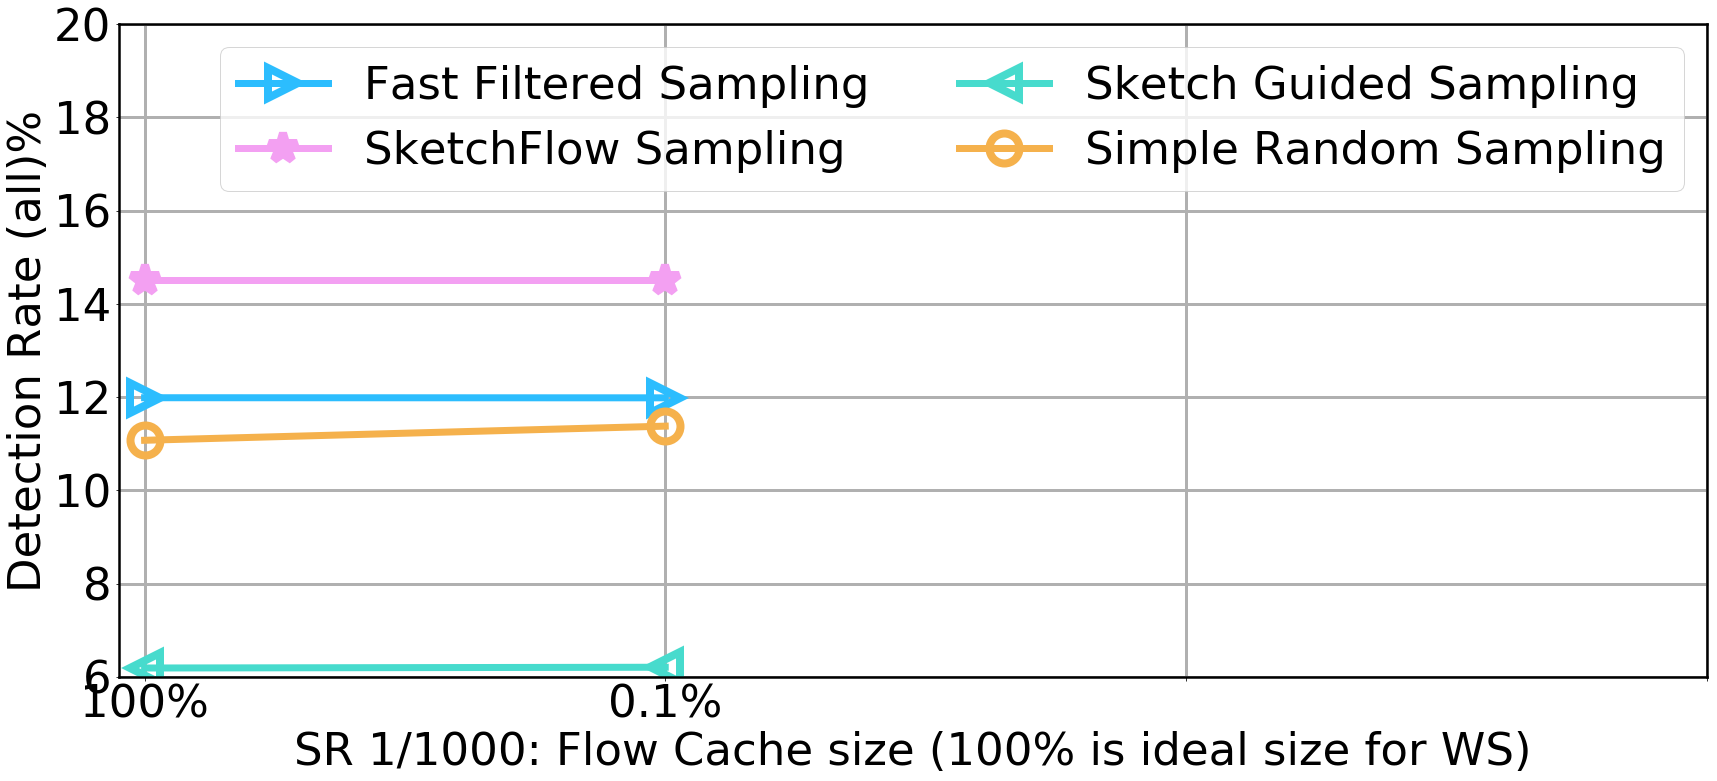

In [9]:
sr_dir = 'SR_0.1'
roots = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir),
        ]

classifier_fingerprint = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01_md_25'



recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    print(sampling_dirs)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type=eval_type) for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls[name].append(avg_dr)
        
    
#drawing
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')

plt.grid(linewidth=3)

plt.ylabel('Detection Rate ({})%'.format(eval_type))
plt.xlabel('SR 1/1000: Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
ax.set_ylim(6,20)
#plt.yticks([30,40,50,60],['30','40','50','60'])
fig.tight_layout()
plt.legend(ncol=2)

outfile = join(roots[0],outfile_regex.format(eval_type))
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

In [10]:
ws_dt = defaultdict(lambda: list) 
ws_dt['all']= [90.0, 24.22]
ws_dt['any'] = [99.08, 92.31]

sr_dir = 'SR_10.0'
roots = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
         '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
         '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
         '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir),
        ]

classifier_fingerprint = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01_md_25'

recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    print(sampling_dirs)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type=eval_type) for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls[name].append(avg_dr)
        
    
#drawing
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"] = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')
#ax.plot(np.arange(len(roots)),ws_dt[eval_type],label='WS',linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')

plt.grid(linewidth=3)

plt.ylabel('Detection Rate ({})%'.format(eval_type))
plt.xlabel('SR 1/10: Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
#ax.set_ylim(30,60)
#plt.yticks([30,40,50,60],['30','40','50','60'])
fig.tight_layout()
plt.legend(ncol=2)

outfile = join(roots[0],outfile_regex.format(eval_type))
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SR_10.0/'

## From Previous work

In [ ]:

sr_dir = 'SR_10.0'
roots = ['/data/juma/data/ids18/archive_before_date_issue/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
         '/data/juma/data/ids18/archive_before_date_issue/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/archive_before_date_issue/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/archive_before_date_issue/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir),
        ]

xtick_indices = np.arange(len(roots))
xtick_labels = ['100%','10%','1%','0.1%']#,'5%','1%','0.5','0.1%']
classifier_fingerprint = 'c_forest_b_explicit_n_100_bootstrap_True_mf_auto_msl_3_ms_0.01_md_25'



recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    print(sampling_dirs)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type=eval_type) for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls[name].append(avg_dr)
        
    
#drawing
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')

plt.grid(linewidth=3)

plt.ylabel('Detection Rate ({})%'.format(eval_type))
plt.xlabel('Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
ax.set_ylim(60,100)
#plt.yticks([30,40,50,60],['30','40','50','60'])
fig.tight_layout()
plt.legend(ncol=2)

outfile = join(roots[0],outfile_regex.format(eval_type))
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()